# Introduction

A Comparative Study of Three Intelligent Techniques for the
Disease Prediction Domain

---

**Done By:** Ali Abdulla (A00786), Mariam Hussein (A00039), and Rawan Albinzayed (A00080)

**Institution:** American University of Bahrain

**Course:** COSC 442 - Artificial Intelligence

**Submission Date:** April 21, 2024

---

This file contains three implementations of machine learning algorithms (Artificial Neural Networks, Fuzzy Logic, and Support Vector Machines) and are tested in their efficiency in predicting heart disease in patients given a particular dataset. The dataset was collected researchers at UC Irvine and can be found in the following link: [https://archive.ics.uci.edu/dataset/45/heart+disease](https://archive.ics.uci.edu/dataset/45/heart+disease).

# Import Components
Import all the following modules and libraries to be used during this project including the dataset.

In [1]:
#Install Required Modules
!pip install keras
!pip install matplotlib
!pip install scikit-fuzzy
!pip install sklearn
!pip install tensorflow
!pip install ucimlrepo

#Importing Libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.utils import to_categorical
from keras import regularizers
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import sklearn
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import sys
from tensorflow import keras
import time

#Import the Dataset
from ucimlrepo import fetch_ucirepo
heart_disease = fetch_ucirepo(id=45)
heart_disease = pd.read_csv('./heart_disease.csv')

#Verify the dataset has been imported
print('Shape of DataFrame: {}'.format(heart_disease.shape))
print(heart_disease.loc[1])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Shape of DataFrame: (303, 14)
age          67.0
sex           1.0
cp            4.0
trestbps    160.0
chol        286.0
fbs           0.0
restecg       2.0
thalach     108.0
exang         1.0
oldpeak       1.5
slope         2.0
ca            3.0
thal          3.0
num           2.0
Name: 1, dtype: float64


# Data Preprocessing
Clean the dataset by removing any missing variables, any tuples that include missing data, and change the features to be of numerical types.



In [2]:
#Remove any missing variables
data = heart_disease[~heart_disease.isin(['?'])]

#Remove the tuples that have missing data
data = data.dropna(axis=0)

#Change the dataset to numeric type
data = data.apply(pd.to_numeric)
data.dtypes

#Change the target feature name
data = data.rename(columns={"num":"target"})

#Verify
print(data.shape)
print(data.dtypes)
data.describe()

(297, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


#Training and Testing Sets

Create two different where the first includes the whole preprocessed dataset without the target feature and the second contains the same but includes the target feature. Then normalize the first array before splitting both of them into training and testing datasets (80% for training and 20% for testing). And then, the target variable of the second array will be converted into a categorical feature.

In [3]:
#Create an array that includes the whole preprocessed dataset excluding the target feature
X = np.array(data.drop(['target'], axis=1))

#Create an array that includes the whole preprocessed dataset including the target feature
Y = np.array(data['target'])

#Normalize the first array
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

#Split the two array for training (80%) and testing (20%)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, stratify=Y, random_state=42, test_size = 0.2)

#Convert dataset to categorical types
Y_train = to_categorical(Y_train, num_classes=None)
Y_test = to_categorical(Y_test, num_classes=None)

#Output the two arrays
print("Normalized Training Array without Target Feature")
print (X_train)
print("Normalized Training Array with Target Feature")
print (Y_train)

Normalized Training Array without Target Feature
[[ 0.27205887 -1.44697961 -1.20245913 ...  0.6437811   0.34482438
  -0.89422007]
 [-1.72030648  0.69109474 -0.16428947 ... -0.97658319 -0.72197605
  -0.89422007]
 [-1.27755862  0.69109474 -0.16428947 ... -0.97658319  0.34482438
  -0.89422007]
 ...
 [-1.49893255 -1.44697961 -0.16428947 ... -0.97658319 -0.72197605
  -0.89422007]
 [ 1.04686761  0.69109474 -0.16428947 ...  0.6437811  -0.72197605
   1.17257652]
 [-0.83481077  0.69109474 -0.16428947 ... -0.97658319 -0.72197605
  -0.89422007]]
Normalized Training Array with Target Feature
[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


#Artificial Neural Network

Using the Sequential API imported from the Keras library, the function called GenerateModel will create a linear stack of layers. The "Dense" layer has 16 neurons with an input dimension of 13 for each feature from the postprocessed dataset. The hidden layer called "Droput" has a dropout rate of 25%. This is done to prevent overfitting by randomly changing some of the inputs to the value zero. The next layer is the "Dense" layer and uses the ReLU activation function. After that, another dropout layer is added for the same reason as earlier. Finally, another dense layer is added, but this time with 5 neurons which represent that classification feature. After this model is created, it then compiled with the loss function "categorical_crossentropy" since it is a multiclass classification problem. Finally, the optimizer RMSprop is used as the adaptive learning rate optimization algorithm. The metric used to monitor it during the epochs of the training process is accuracy.

Once this model is created, it is fit with the training data obtained earlier and validated with the testing data also obtained earlier.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5754 - loss: 0.6907 - val_accuracy: 0.8500 - val_loss: 0.6687
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7331 - loss: 0.6731 - val_accuracy: 0.8500 - val_loss: 0.6425
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7623 - loss: 0.6419 - val_accuracy: 0.8333 - val_loss: 0.6029
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7904 - loss: 0.6168 - val_accuracy: 0.8833 - val_loss: 0.5594
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8294 - loss: 0.5724 - val_accuracy: 0.8833 - val_loss: 0.5168
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8144 - loss: 0.5321 - val_accuracy: 0.8833 - val_loss: 0.4701
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8488 - loss: 0.4891 - val_accuracy: 0.8833 - val_loss: 0.4348
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8057 - loss: 0.4894 - val_accuracy: 0.8667 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 740 (2.89 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 371 (1.45 KB)

None
Time taken to execute the code: 37.580 seconds
Space complexity of the model: 48.000 bytes


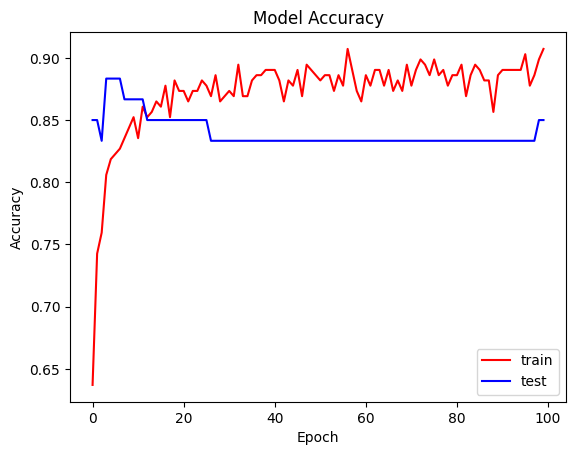

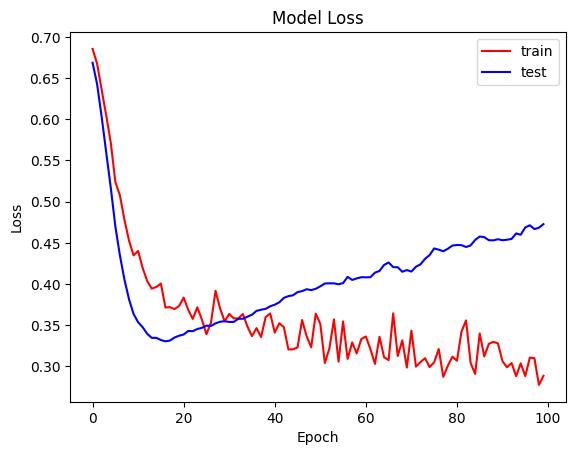

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Classification Report (ANN):
               precision    recall  f1-score   support

           0       0.15      0.12      0.14        32
           1       0.15      0.45      0.23        11
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.15        60
   macro avg       0.06      0.12      0.07        60
weighted avg       0.11      0.15      0.11        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [4]:
# Time Complexity (Time)
start_time_ANN = time.time()

# Convert target feature into binary classification
Y_train_binary = Y_train.copy()
Y_test_binary = Y_test.copy()
Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

#print(Y_train_binary[:20])

def create_binary_model():
    # Create Model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    # Compile Model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

# Fit the model
history = binary_model.fit(X_train, Y_train_binary[:,0], validation_data=(X_test, Y_test_binary[:,0]), epochs=100, batch_size=10, verbose = 1)

# Space Complexity (Memory Usage)
model_size_ANN = sys.getsizeof(binary_model)

# Measure elapsed time
elapsed_time_ANN = time.time() - start_time_ANN
print(binary_model.summary())
print("Time taken to execute the code: {:.3f} seconds".format(elapsed_time_ANN))
print("Space complexity of the model: {:.3f} bytes".format(model_size_ANN))

%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

# Model Loss
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

# Predictions on test data
Y_pred_binary = binary_model.predict(X_test)

# Convert predictions to binary labels
Y_pred_binary = (Y_pred_binary > 0.5).astype(int)

# Convert target feature to binary labels
Y_test_binary = (Y_test_binary > 0).astype(int)

# **Reshape Y_pred_binary**
Y_pred_binary = Y_pred_binary.flatten() # Flatten Y_pred_binary
Y_pred_binary = (Y_pred_binary > 0.5).astype(int)  # Apply threshold

# Convert Y_test_binary to binary labels (New line)
Y_test_binary = np.argmax(Y_test_binary, axis=1)  # Convert to binary labels

# Generate classification report
classification_report_ann = classification_report(Y_test_binary, Y_pred_binary)
print("Classification Report (ANN):\n", classification_report_ann)

#Support Vector Machines

Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best Score: 0.5823581560283688

SVM Classifier - Test Accuracy (after tuning): 0.6333333333333333

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.78      0.97      0.86        36
           1       0.33      0.11      0.17         9
           2       0.33      0.40      0.36         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.63        60
   macro avg       0.29      0.30      0.28        60
weighted avg       0.54      0.63      0.57        60

Time taken to execute the code: 8.246 seconds
Space complexity of the model: 48.000 bytes


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


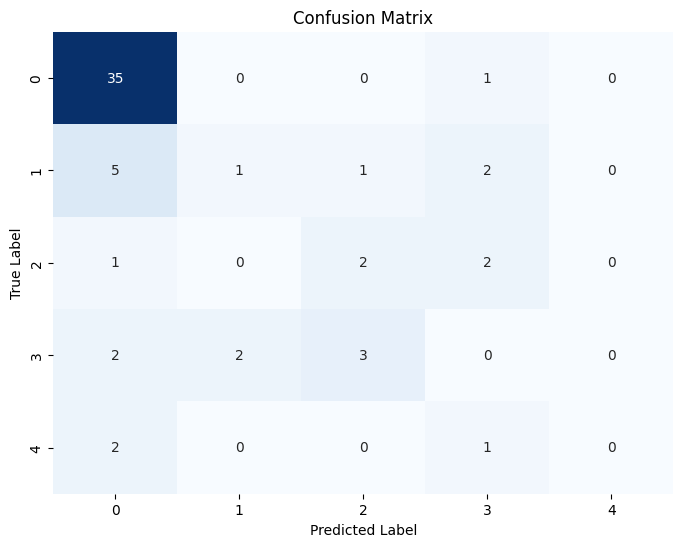

In [5]:
# Start measuring time
start_time_SVM = time.time()

# Data splitting (ensure the same random state for reproducibility)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Data preprocessing (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target feature into 1D array for multiclass labels
Y_train_1d = Y_train.ravel()
Y_test_1d = Y_test.ravel()

# Check the shape of input features and target variable
if X_train_scaled.shape[0] != Y_train_1d.shape[0]:
    raise ValueError("Number of samples in X_train_scaled and Y_train_1d are not consistent.")

# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Create SVM classifier
svm_classifier = SVC()

# Instantiate GridSearchCV
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

# Perform Grid Search Cross-Validation
grid_search.fit(X_train_scaled, Y_train_1d)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best estimator
best_svm_classifier = grid_search.best_estimator_

# Predictions on test data using the best estimator
svm_predictions_test = best_svm_classifier.predict(X_test_scaled)

# Evaluation
print("\nSVM Classifier - Test Accuracy (after tuning):", best_svm_classifier.score(X_test_scaled, Y_test_1d))
print("\nClassification Report (Test Data):\n", classification_report(Y_test_1d, svm_predictions_test))

# Measure memory usage
model_size_SVM = sys.getsizeof(best_svm_classifier)

# Measure elapsed time
elapsed_time_SVM = time.time() - start_time_SVM

print("Time taken to execute the code: {:.3f} seconds".format(elapsed_time_SVM))
print("Space complexity of the model: {:.3f} bytes".format(model_size_SVM))

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test_1d, svm_predictions_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Random Forest


In [6]:
# Start measuring time
start_time_RF = time.time()

# Data splitting (ensure the same random state for reproducibility)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Data preprocessing (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target feature into 1D array for multiclass labels
Y_train_1d = Y_train.ravel()
Y_test_1d = Y_test.ravel()

# Define the parameter grid for randomized search
param_dist = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}

# Create Random Forest classifier
rf_classifier = RandomForestClassifier()

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Perform Randomized Search Cross-Validation
random_search.fit(X_train_scaled, Y_train_1d)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Get the best estimator
best_rf_classifier = random_search.best_estimator_

# Predictions on test data using the best estimator
rf_predictions_test = best_rf_classifier.predict(X_test_scaled)

# Evaluation
print("\nRandom Forest Classifier - Test Accuracy (after tuning):", best_rf_classifier.score(X_test_scaled, Y_test_1d))
print("\nClassification Report (Test Data):\n", classification_report(Y_test_1d, rf_predictions_test))

# Measure memory usage
model_size_RF = sys.getsizeof(best_rf_classifier)

# Measure elapsed time
elapsed_time_RF = time.time() - start_time_RF

print("Time taken to execute the code: {:.3f} seconds".format(elapsed_time_RF))
print("Space complexity of the model: {:.3f} bytes".format(model_size_RF))

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}
Best Score: 0.5822695035460994

Random Forest Classifier - Test Accuracy (after tuning): 0.6333333333333333

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.73      1.00      0.85        36
           1       0.00      0.00      0.00         9
           2       0.25      0.20      0.22         5
           3       0.33      0.14      0.20         7
           4       0.00      0.00      0.00         3

    accuracy                           0.63        60
   macro avg       0.26      0.27      0.25        60
weighted avg       0.50      0.63      0.55        60

Time taken to execute the code: 99.243 seconds
Space complexity of the model: 48.000 bytes


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
